# Exercise: House price prediction
    
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data



Dataset: https://raw.githubusercontent.com/abulbasar/data/master/kaggle-houseprice/data_combined_cleaned.csv

Build a predictive model using SalesPrice as the outcome variable and the rest as predicter variables.

Find rmse and r2 score for training and test dataset. 



In [1]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

%matplotlib inline

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [2]:
df = pd.read_csv("/data/kaggle/house-prices/data_combined_cleaned.csv")
del df["Id"]
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
MasVnrType       2919 no

In [4]:
df = df[~np.isnan(df.SalesPrice)]
df.shape

(1460, 79)

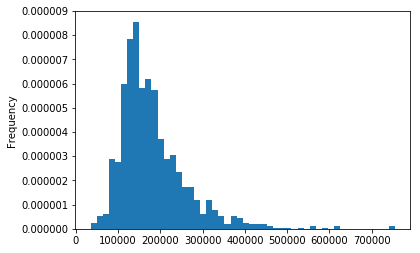

In [5]:
target = "SalesPrice"
df[target].plot.hist(bins = 50, normed = True)
target_mean = df[target].mean()
#plt.plot([target_mean, target_mean], [0, 1.0])

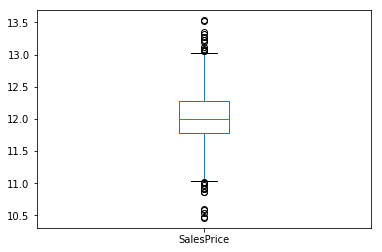

In [6]:
np.log(df[target]).plot.box()

In [8]:
y = np.log(df[target])
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)
print("X_train", X_train.shape, "X_test", X_test.shape)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.Lasso(alpha=0.01))
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("\ntraining mse", metrics.mean_squared_error(y_train, y_train_pred),
      "\ntest mse", metrics.mean_squared_error(y_test, y_test_pred),
      "\ntraining R2", metrics.r2_score(y_train, y_train_pred),
      "\ntest R2", metrics.r2_score(y_test, y_test_pred)
     )

X_train (1022, 258) X_test (438, 258)

training mse 0.01552703945002047 
test mse 0.022954852934347732 
training R2 0.8940480673803641 
test R2 0.8785389987905549


# Feature selection using Lasso

In [10]:
est = pipe.steps[-1][-1]
pd.DataFrame({"feature": X.columns, "coef": est.coef_}).query("coef != 0").shape

(59, 2)

In [11]:
pd.DataFrame({"feature": X.columns, "coef": est.coef_}).query("coef != 0")

,coef,feature
0,-0.014961,MSSubClass
2,0.011859,LotArea
3,0.104135,OverallQual
4,0.023309,OverallCond
5,0.029465,YearBuilt
6,0.021713,YearRemodAdd
11,0.004723,TotalBsmtSF
12,0.007722,1stFlrSF
15,0.095563,GrLivArea
16,0.018030,BsmtFullBath


In [12]:
from sklearn.feature_selection import f_regression

In [13]:
f_vals, p_vals = f_regression(X=X, y = y)

In [17]:
top10_features = pd.DataFrame({"feature": X.columns, 
                               "pval": p_vals}).sort_values("pval").iloc[:10, :]
top10_features

,feature,pval
3,OverallQual,0.000000e+00
15,GrLivArea,3.060209e-216
25,GarageCars,3.093756e-199
26,GarageArea,1.106255e-176
11,TotalBsmtSF,7.534551e-151
12,1stFlrSF,1.074698e-141
151,ExterQual_TA,4.749723e-141
18,FullBath,2.118958e-140
5,YearBuilt,1.103567e-135
24,GarageYrBlt,7.405437e-126


In [20]:
top10_features_values = list(top10_features.feature)
top10_features_values

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'ExterQual_TA',
 'FullBath',
 'YearBuilt',
 'GarageYrBlt']

In [22]:
top10_features_values = ['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'ExterQual',
 'FullBath',
 'YearBuilt',
 'GarageYrBlt']

In [23]:
y = np.log(df[target])
X = df.copy()
del X[target]
X = X[top10_features_values]
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)
print("X_train", X_train.shape, "X_test", X_test.shape)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.Lasso(alpha=0.01))
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("\ntraining mse", metrics.mean_squared_error(y_train, y_train_pred),
      "\ntest mse", metrics.mean_squared_error(y_test, y_test_pred),
      "\ntraining R2", metrics.r2_score(y_train, y_train_pred),
      "\ntest R2", metrics.r2_score(y_test, y_test_pred)
     )

X_train (1022, 12) X_test (438, 12)

training mse 0.029714280265793036 
test mse 0.031608396016205915 
training R2 0.7972385250455373 
test R2 0.8327505108513082
